### Relationship between FINRA Margin Debt and the SPX Stock Market Index

Data Source: YCharts

#### Import Libraries

In [121]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd

import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
from matplotlib.dates import DateFormatter
from matplotlib import ticker
%matplotlib inline
import seaborn as sns # Plotting
import mplfinance as mpf # Matplotlib finance

import datetime as dt # For defining dates
import time
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#### Get dataframe from CSV, save dataframe to CSV

In [2]:
PATH = (r"C:/Users/User/Documents/Chartbook/Margin Debt/")
def get_df_from_csv(data_source):
    try:
        df = pd.read_csv(PATH + data_source + ".csv") # index_col='Date', parse_dates=True
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [3]:
def save_df_to_csv(df, ticker):
    df.to_csv(PATH + ticker + ".csv")

#### Get data for margin debt and historical SPX Close Prices

In [33]:
# get margin debt data
MD = get_df_from_csv('FINRA Margin Debt (YCharts)')
MD['Date'] = pd.to_datetime(MD.Date)
MD

,Date,Value
0,2023-01-31,641.23
1,2022-12-31,606.66
2,2022-11-30,643.78
3,2022-10-31,649.62
4,2022-09-30,664.01
...,...,...
149,2010-06-30,263.20
150,2010-05-31,268.57
151,2010-04-30,295.55
152,2010-03-31,277.80


In [9]:
# get historical SPX Close Prices, clean data and return dataframe
SPX = get_df_from_csv('SPX Historical Daily Prices')
SPX['Date'] = pd.to_datetime(SPX.Date, utc=True, format = '%Y-%m-%d') # 'Date' to pandas.datetime
SPX.sort_values(by='Date', ascending=False, inplace=True) # sort dates descending
SPX['Date'] = SPX['Date'].dt.date # keep only dates. remove remaining timestamp data (hours, minutes etc.)
SPX['Date'] = pd.to_datetime(SPX.Date, format = '%Y-%m-%d') # 'Date' to pandas.datetime
SPX

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
13872,2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,3891520000,0.0,0.0
13871,2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0
13870,2023-02-08,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,0.0,0.0
13869,2023-02-07,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,0.0,0.0
13868,2023-02-06,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,0.0,0.0
...,...,...,...,...,...,...,...,...
4,1968-01-08,0.000000,97.400002,95.540001,96.620003,14260000,0.0,0.0
3,1968-01-05,0.000000,96.660004,94.970001,95.940002,11880000,0.0,0.0
2,1968-01-04,0.000000,96.230003,94.309998,95.360001,13440000,0.0,0.0
1,1968-01-03,0.000000,96.949997,95.040001,95.669998,12650000,0.0,0.0


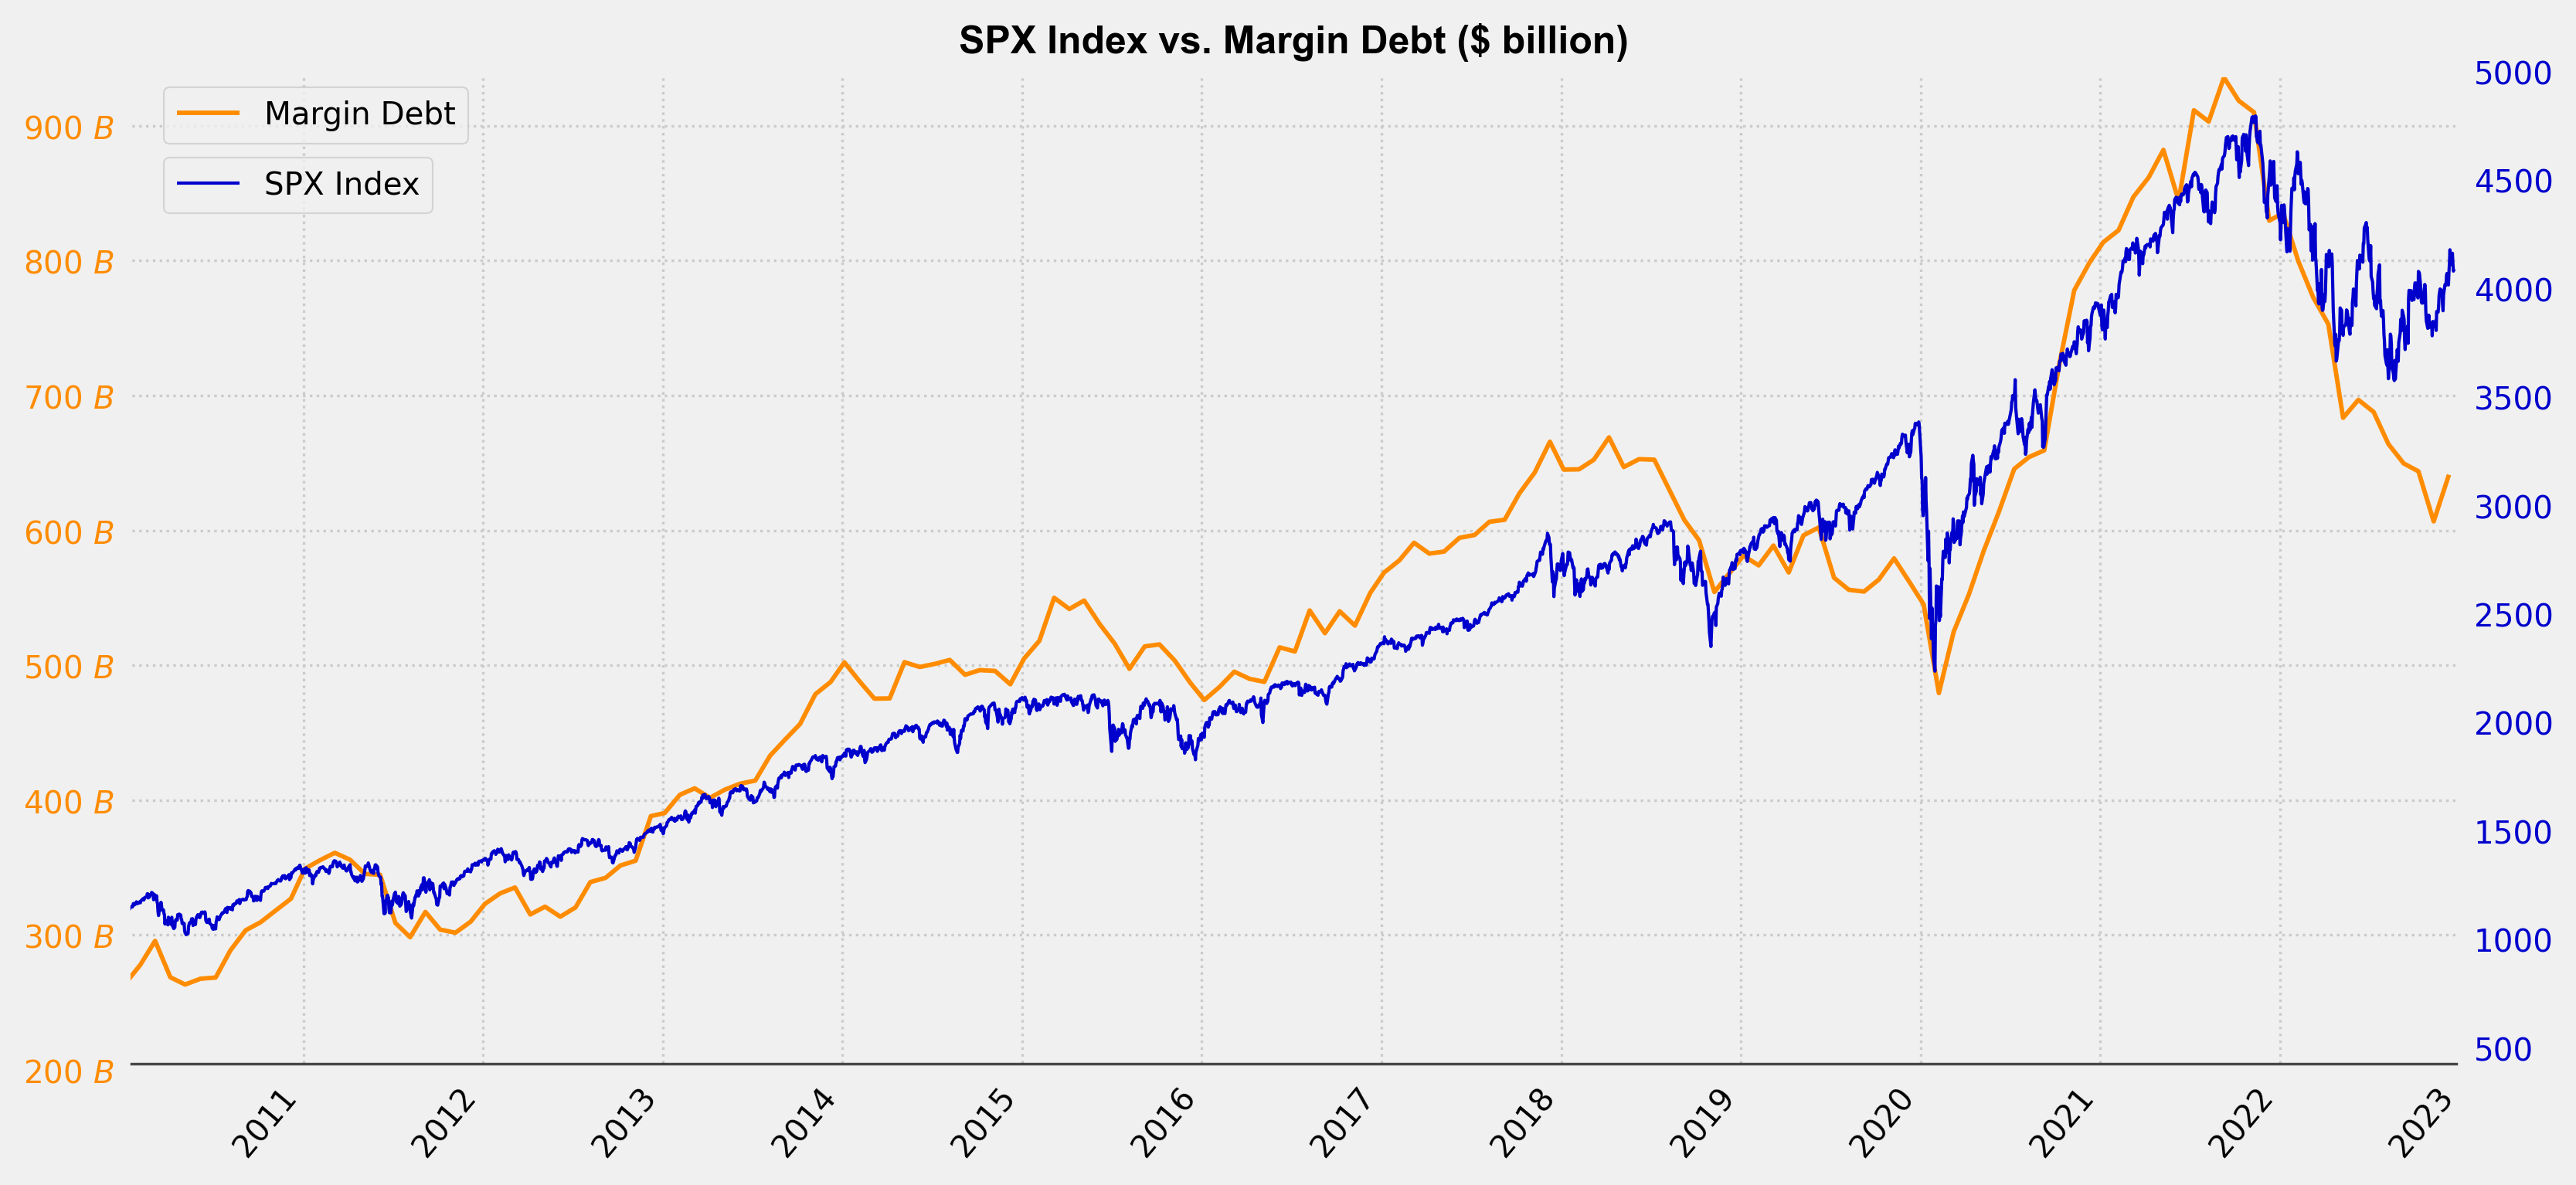

In [133]:
# create the plot figure
fig, ax1 = plt.subplots(figsize = (11, 5), dpi=300)
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 
#plt.margins(0, 0.05) # manually fit x and y series inside plot area, or use autoscaling bellow. 
plt.autoscale(enable=None, axis="x", tight=True)

plt.style.use('fivethirtyeight') # setting grid style with seaborn

font = {'family': 'sans-serif',
        'name': 'arial',
        'color': 'black',
        'weight': 'bold',
        'size': 12,
        }

# Plot the margin debt values on the left y-axis
color = 'darkorange'
ax1.plot(MD['Date'], MD['Value'], c='darkorange', lw=1.4, alpha=1) # plot data
ax1.set_xlim([dt.datetime(2010,2,28), dt.datetime(2023,2,28)]) # set x-axis view range 
ax1.tick_params(axis='x', labelcolor='black', labelsize='x-small') # format tick style
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=365)) # x-axis tick label interval
# rotate and right-align x-axis labels so they don't crowd each other. which = major (select major ticks)
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=50, horizontalalignment='right')
ax1.grid(linestyle=':', linewidth=0.8) # style grid

# set params for left y-axis
ax1.set_ylim(200, 940) # set y-axis view range
ax1.tick_params(axis='y', labelcolor=color, labelsize='x-small') # format tick style
ax1.yaxis.set_major_locator(ticker.MultipleLocator(100)) # major tick position
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g $B$')) # add string (B) to tick label
# bbox_to_anchor : specific position of the legend (x, y, width, height)
ax1.legend(['Margin Debt'], loc='upper left', fontsize='x-small', bbox_to_anchor=(0.01, 0, 0, 1))

# create a twin y-axis for the SPX close prices on the right side
ax2 = ax1.twinx()
color = 'mediumblue'
ax2.plot(SPX['Date'], SPX['Close'], color=color, lw=1, alpha=1) # plot series
ax2.set_ylim(400, 5000) # set y-axis view range
ax2.yaxis.grid(False) # remove second grid 

# set params for second/right y-axis
ax2.tick_params(axis='y', labelcolor=color, labelsize='x-small') # format tick style
ax2.yaxis.set_major_locator(ticker.MultipleLocator(500)) # major tick position
ax2.legend(['SPX Index'], loc='upper left', fontsize='x-small', bbox_to_anchor=(0.01, 0, 0, 0.93))
ax2.axhline(y = 425, color = 'black', linewidth = 1.3, alpha = .7) 

plt.title("SPX Index vs. Margin Debt ($ billion)", loc='center', fontdict=font)

# show the plot
plt.show();
